In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
X = 0.06  # Threshold for high latency
Y = 0.02  # Threshold for low latency
DATA_FN = "front-end latency-data-2025-05-28 20_22_44.csv"

df = pd.read_csv(os.path.join("results", DATA_FN), parse_dates=["Time"])

In [3]:
def save_plot(fig, filename, show=True):
    filepath = os.path.join(os.path.join("results", "processed", DATA_FN.replace(".csv", "")), filename)
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    fig.savefig(filepath)
    print(f"Saved plot to {filepath}")
    if show:
        plt.show()
    else:
        plt.close(fig)

Saved plot to results/processed/front-end latency-data-2025-05-28 20_22_44/plot1.png


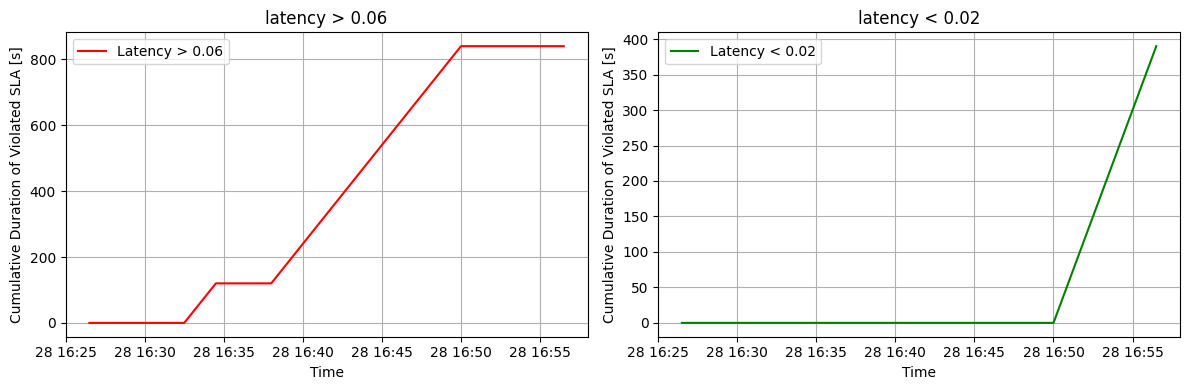

In [4]:
# Compute the time difference between samples (assumed constant)
df['delta_time'] = df['Time'].diff().dt.total_seconds().fillna(0)

df['high_latency'] = df['mean latency'] > X
df['low_latency'] = df['mean latency'] < Y

df['cumulative_time_high'] = (df['delta_time'] * df['high_latency']).cumsum()
df['cumulative_time_low'] = (df['delta_time'] * df['low_latency']).cumsum()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(df['Time'], df['cumulative_time_high'], label=f'Latency > {X}', color='red')
axes[0].set_title(f'latency > {X}')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Cumulative Duration of Violated SLA [s]')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(df['Time'], df['cumulative_time_low'], label=f'Latency < {Y}', color='green')
axes[1].set_title(f'latency < {Y}')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Cumulative Duration of Violated SLA [s]')
axes[1].grid(True)
axes[1].legend()

fig.tight_layout()

save_plot(fig, "plot1.png", show=True)

Saved plot to results/processed/front-end latency-data-2025-05-28 20_22_44/plot2.png


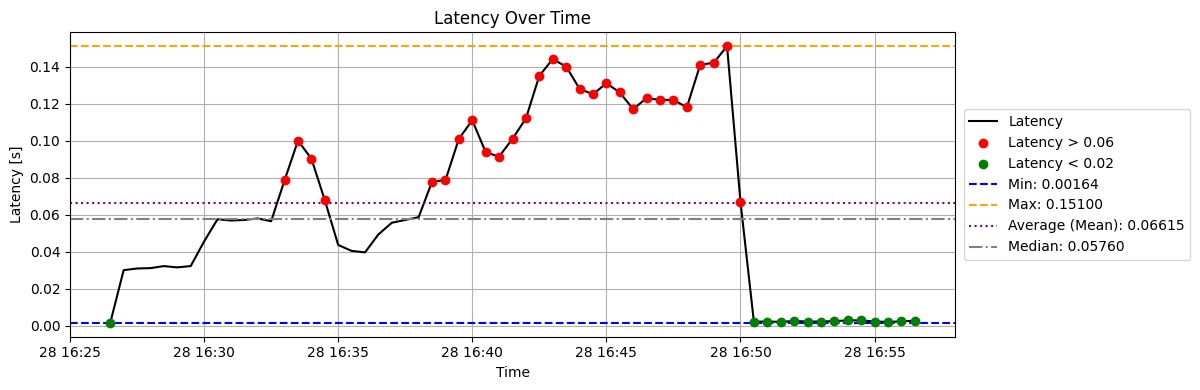

In [5]:
min_latency = df['mean latency'].min()
max_latency = df['mean latency'].max()
avg_latency = df['mean latency'].mean()
median_latency = df['mean latency'].median()

min_time = df.loc[df['mean latency'].idxmin(), 'Time']
max_time = df.loc[df['mean latency'].idxmax(), 'Time']

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df['Time'], df['mean latency'], label='Latency', color='black')

ax.scatter(df['Time'][df['high_latency']], df['mean latency'][df['high_latency']], color='red', label=f'Latency > {X}', zorder=3)
ax.scatter(df['Time'][df['low_latency']], df['mean latency'][df['low_latency']], color='green', label=f'Latency < {Y}', zorder=3)

ax.axhline(min_latency, color='blue', linestyle='--', label=f'Min: {min_latency:.5f}')
ax.axhline(max_latency, color='orange', linestyle='--', label=f'Max: {max_latency:.5f}')
ax.axhline(avg_latency, color='purple', linestyle=':', label=f'Average (Mean): {avg_latency:.5f}')
ax.axhline(median_latency, color='gray', linestyle='-.', label=f'Median: {median_latency:.5f}')

ax.set_title("Latency Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Latency [s]")
ax.grid(True)

ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), borderaxespad=0.)

fig.tight_layout()
fig.subplots_adjust(right=0.8)

save_plot(fig, "plot2.png", show=True)